In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
from scipy.signal import find_peaks

In [179]:
# Cough audio loading
cough_audio = './cough-audio-5.wav'
data, sample_rate = librosa.load(cough_audio)

# Audio duration
duration = librosa.get_duration(path = cough_audio)
time = np.arange(0, len(data)) / sample_rate

print("Audio Duration: {}".format(duration))
print("Sample Rate: {}".format(sample_rate))

Audio Duration: 35.008
Sample Rate: 22050


In [180]:
# The audio
Audio(cough_audio)

In [181]:
# Data normalization
mean = np.mean(data)
std = np.std(data)

data = (data - mean) / std

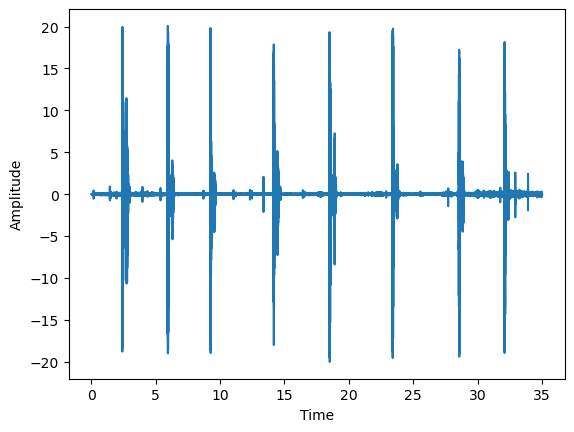

In [182]:
# Data graph

plt.plot(time, data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [183]:
# Moving Average of the Data:
def moving_average(data, window_size):
    
    moving_averages = []

    i = 0
    while i < len(data) - window_size + 1:
        
        window = data[i : i + window_size]
        window_average = round(sum(window) / window_size, 2)
        moving_averages.append(window_average)

        i += 1    
    
    return np.array(moving_averages)

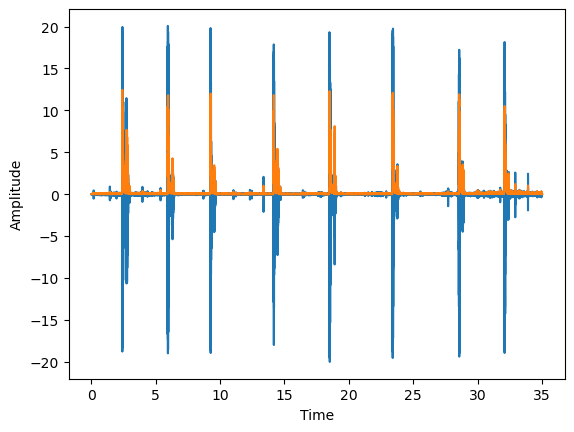

In [184]:
# Graph of moving average of the data and normal data

filter_length = 25
moving_avg_data = moving_average(np.abs(data), filter_length)

time_data = np.arange(0, len(data)) / sample_rate
time_moving_avg = np.arange(0, len(moving_avg_data)) * (len(data) / len(moving_avg_data)) / sample_rate


plt.plot(time_data, data)
plt.plot(time_moving_avg, moving_avg_data)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [201]:
# Finding the number of coughs with a threshold

max_value = np.max(moving_avg_data)
std = np.std(moving_avg_data)

threshold_range = (max_value - 3 * std, max_value)
print(threshold_range)

data_length = len(moving_avg_data)
print("Data Length: {}".format(data_length))

div = 6000
data_subparts = np.array_split(moving_avg_data, data_length/div)
cough_count = 0
cough_time = []

for i, subpart in enumerate(data_subparts):
    
    indices = np.where((subpart > threshold_range[0]) & (subpart < threshold_range[1]))[0]
    
    if len(indices) > 0:
        index = np.max(indices)
        cough_count += 1
        cough_time.append(index + i * div)

print("Cough Count: {}".format(cough_count))
print("Cough Time: {}".format(cough_time))

(9.921148165751996, 12.45)
Data Length: 771903
Cough Count: 8
Cough Time: [53319, 131280, 203549, 310963, 406550, 514393, 626895, 704221]


[ 2.41795918  5.9706576   9.27247166 14.17410431 18.50571429 23.4077551
 28.57265306 32.09931973]


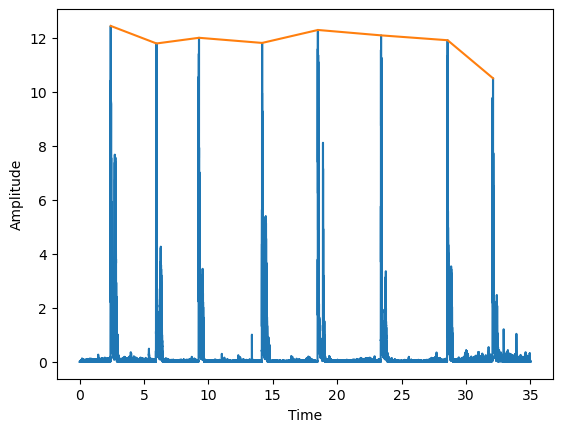

In [202]:
# Finding the number of coughs using peak detection


peaks, _ = find_peaks(moving_avg_data, prominence = 9)
upper_envelope = moving_avg_data[peaks]

time = np.arange(0, len(moving_avg_data)) / sample_rate
time_envelope = time[peaks]

print(time_envelope)

plt.plot(time, moving_avg_data)
plt.plot(time_envelope, upper_envelope)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Problems
1. Instead of subparts, looking the signal window by window may be more suitable.
2. Peak detection algorithm have problems for different data. The prominence should be calculated dynamically.
